In [1]:
#Loading an audio file
import librosa
audio_path = "C:/Users/Mathan_warrior/Desktop/SET/Infant cry detection and Analysis using Artificial intelligence and Machine Learning/baby-crying-01.wav"
x , sr = librosa.load(audio_path,sr=None)

In [2]:
#playing audio
import IPython.display as ipd
ipd.Audio(audio_path)

In [3]:
import warnings
warnings.filterwarnings('ignore')

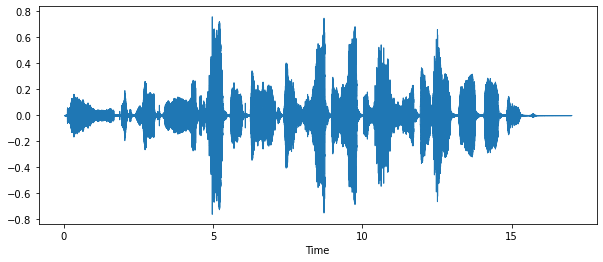

In [4]:
#waveform of the audio file
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=sr)

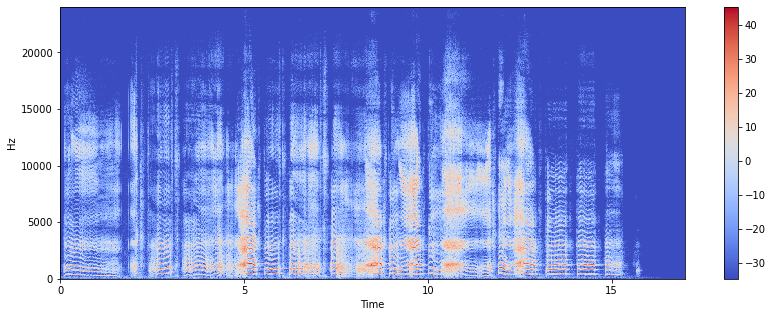

In [5]:
#stft is short term fourier transform
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

In [6]:
#rms value
rms_value=librosa.feature.rms(X,frame_length=2048)
rms_value.shape

(1025, 1, 4)

In [7]:
#spectral centroid
#weighted mean of the frequencies
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids

array([ 6133.16067392,  6313.4525107 ,  6432.40818397, ...,
       16084.1137226 , 17072.54505636, 17536.14554658])

In [8]:
#spectral bandwidth
import sklearn
spectral_band = librosa.feature.spectral_bandwidth(x, sr=sr)[0]
spectral_band

array([6632.41038918, 6709.29132481, 6869.7619531 , ..., 6386.08025571,
       5573.4610904 , 5069.14331124])

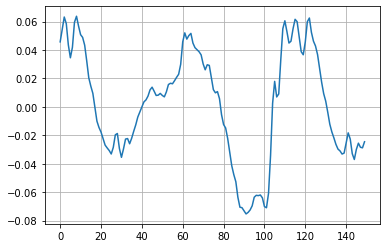

In [9]:
#zooming in process
#for 150 arrays only
start=9950
end=10100
plt.plot(x[start:end])
plt.grid()

In [12]:
#zero crossings are basically for the plots changing from -ve to +ve by crossing zero
zero_crossings = librosa.zero_crossings(x, pad=False)
sum(zero_crossings)

104415

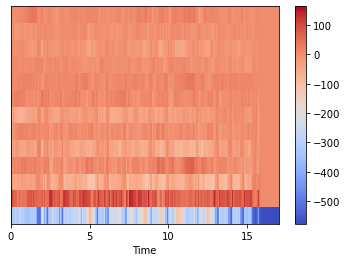

In [13]:
#mfccs 
mfccs = librosa.feature.mfcc(x,n_mfcc=13, sr=sr)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.colorbar()

In [12]:
#delta mfccs and second ordered delta mfccs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(delta_mfccs)

In [13]:
#mel-spectrogram
melspec=librosa.feature.melspectrogram(mfccs)
melspec.shape

(13, 128, 4)

In [14]:
#spectral rolloffs
roll_offs=librosa.feature.spectral_rolloff(x[start:end])
int(roll_offs)

4037